In [1]:
url='https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt'
# The above url is of the main github location for importing it, the raw view url is needed which is below
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [3]:
%matplotlib inline

In [4]:
# Assigning the dataset to a variable'df' as a pandas dataframe
df=pd.read_csv(url)

In [5]:
# Glancing at dataset
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [6]:
# Setting the 
df.set_index('Unnamed: 0',inplace=True)

In [7]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000


## 1. Insights into the data

In [8]:
rows,cols=df.shape
print('Number of rows : ',rows,'\nNumber of columns : ',cols)

Number of rows :  645 
Number of columns :  7


In [9]:
# Getting statistics of every column
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [10]:
# Info of the dataframe and its columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [11]:
# Checking for null values
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [12]:
# Renaming a misspelt column name
df.rename({'Living.Room':'Livingroom'},axis=1,inplace=True)

In [13]:
df

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000


`The total rows are 645 but the row id/ index goes to 648, it is assumed that these are id of houses and thus are ignored`

In [14]:
df.Price.value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

`There are 47 houses priced at 45000 29 at 55000 and so on. `

## 2.Visualization

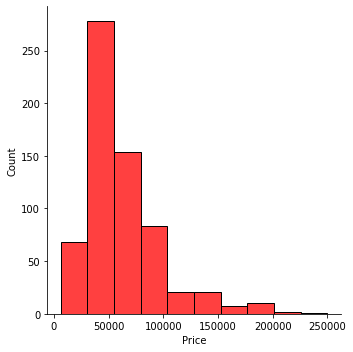

In [15]:
sns.displot(df['Price'],color='red',bins=10)

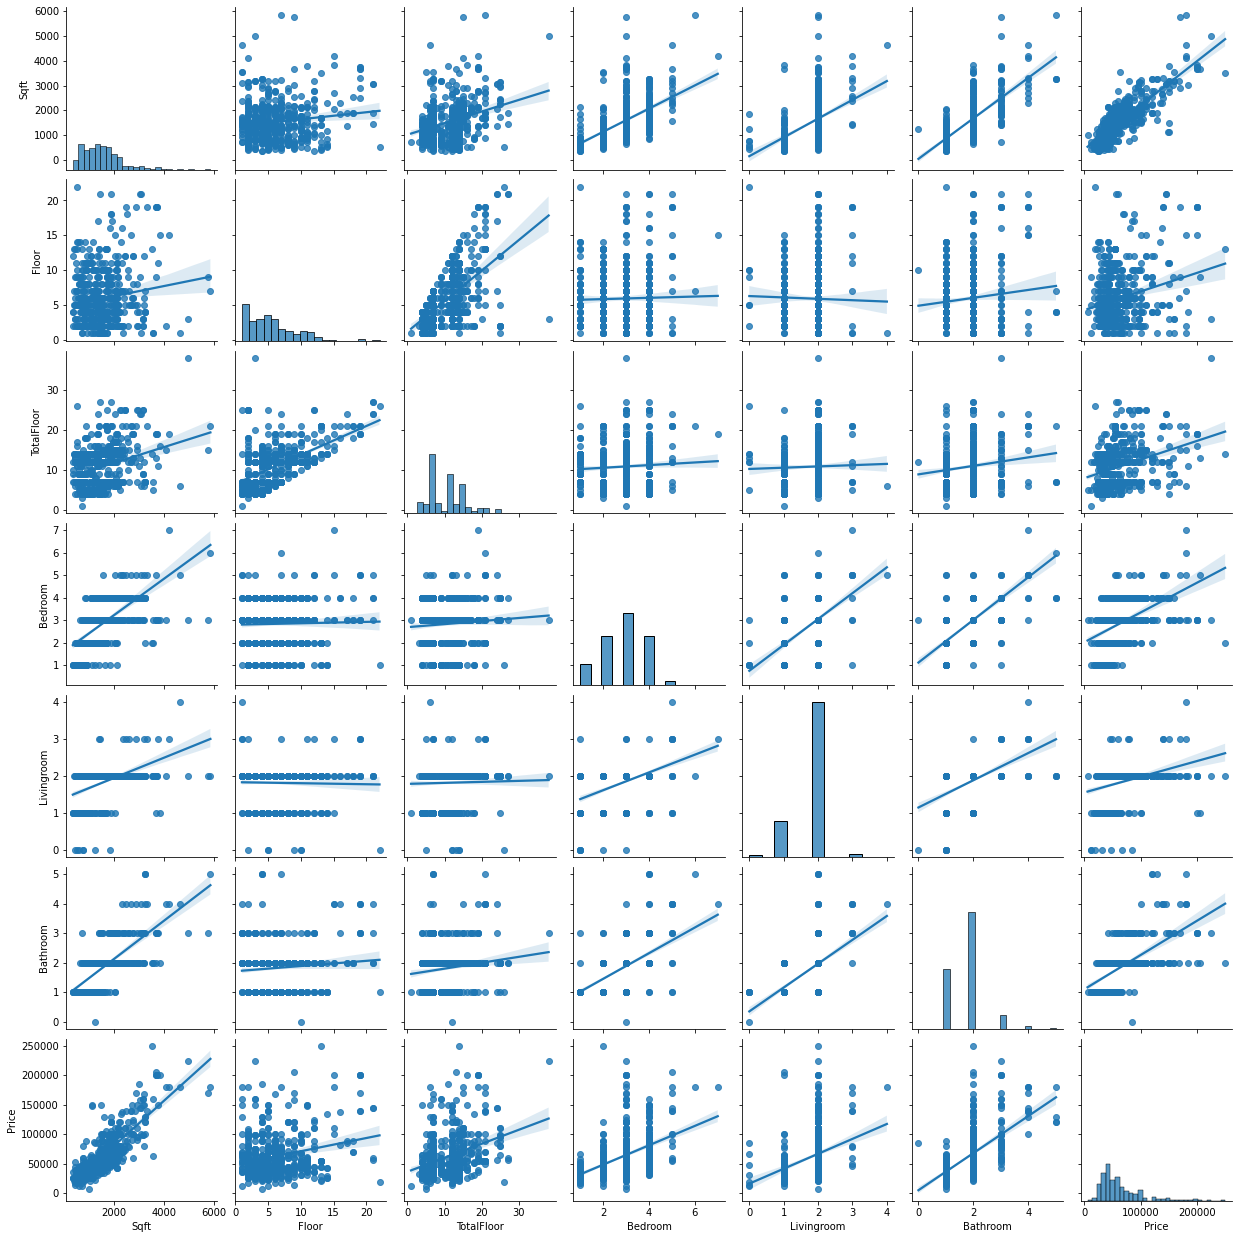

In [16]:
sns.pairplot(df,kind='reg')

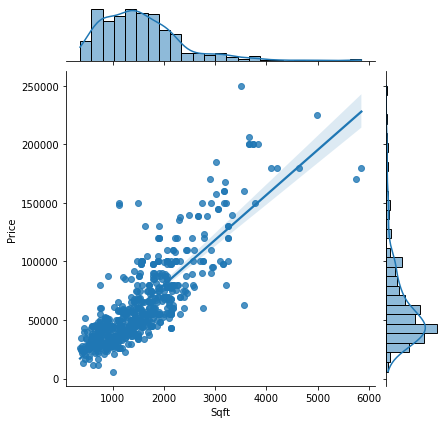

In [17]:
# Comparing Sqft with Price in a jointplot with reg

sns.jointplot(x='Sqft',y='Price',data=df,kind='reg')

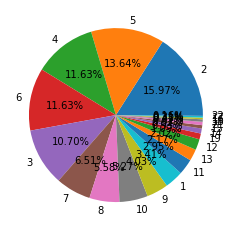

In [18]:
# Pie chart of number of floors
plt.pie(df['Floor'].value_counts(),labels=df['Floor'].value_counts().index,autopct='%1.2f%%')
plt.show()

## 3. Managing data for training and testing

In [19]:
# the dataset
df

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000


In [34]:
# The features
X = df.iloc[:,:6]

# The target
Y = df.iloc[:,6]

In [21]:
X.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom
Unnamed: 0,,,,,,
1,1177.698,2,7,2,2,2
2,2134.800,5,7,4,2,2
3,1138.560,5,7,2,2,1
4,1458.780,2,7,3,2,2
5,967.776,11,14,3,2,2


In [22]:
Y.head()

Unnamed: 0
1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

In [23]:
# Splitting these datasets into training and testing

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

In [24]:
# Checking splitted data
x_train

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom
Unnamed: 0,,,,,,
156,996.240,11,14,3,2,2
182,1487.244,6,7,4,2,2
308,1871.508,11,12,4,2,2
468,1227.510,2,7,3,2,2
235,2067.198,4,14,4,2,2
...,...,...,...,...,...,...
583,796.992,3,12,2,2,1
506,1102.980,2,4,3,1,2
541,1426.758,3,12,3,2,2


In [25]:
y_train

Unnamed: 0
156     44999
182     33700
308     49999
468     39000
235    100000
        ...  
583     45000
506     26000
541     48120
199     65000
178     82000
Name: Price, Length: 483, dtype: int64

In [26]:
x_test

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom
Unnamed: 0,,,,,,
586,1316.460,4,15,3,2,2
224,2138.358,11,14,4,2,2
337,3558.000,1,7,3,2,2
71,889.500,8,12,2,1,1
590,800.550,3,4,2,2,1
...,...,...,...,...,...,...
545,1102.980,2,4,2,1,2
24,1668.702,4,12,3,2,2
276,533.700,7,12,1,1,1


In [27]:
y_test

Unnamed: 0
586     45000
224     55000
337    160000
71      25000
590     43000
        ...  
545     31000
24     105000
276     17000
388     44000
648     36000
Name: Price, Length: 162, dtype: int64

## 4. Modelling and finding better value for k

In [28]:
# Modelling using a k value of 5
model=KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train) # fitting the model
y_pred=model.predict(x_test) # predicting values

# calculating root mean squared error (RMSE)
error = math.sqrt(mean_squared_error(y_test,y_pred))
print(error)

17553.0360311293


In [29]:
# Finding optimal value of k so that RMSE is minimum

rmse_val=[]
for i in range(1,101):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=math.sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append((error,i))
print(rmse_val)   

[(19094.499964196915, 1), (16254.242604045654, 2), (16339.124929976093, 3), (16933.678334489432, 4), (17553.0360311293, 5), (17571.10224840108, 6), (17853.111392437415, 7), (17926.09441847598, 8), (17814.124566081275, 9), (17995.774613954094, 10), (17763.809048112867, 11), (17844.15730355737, 12), (17842.146113913874, 13), (17530.912605919602, 14), (17521.11047763739, 15), (17267.6958666365, 16), (17161.16482721609, 17), (17084.2209947079, 18), (16810.246398564643, 19), (16855.809873257662, 20), (16993.842484882065, 21), (17085.593270629248, 22), (16921.247103833965, 23), (16851.03246675572, 24), (16731.00534495753, 25), (16675.310913114507, 26), (16791.162600232623, 27), (16832.118157760644, 28), (17020.47556755559, 29), (17146.13582360715, 30), (17063.250987445223, 31), (17007.829725410502, 32), (16931.463503203242, 33), (17009.04722913365, 34), (17052.426151642274, 35), (17070.325875291597, 36), (17046.057582258683, 37), (16999.747818395506, 38), (17111.147014099548, 39), (17162.191

In [30]:
# Getting minimum RMSE value
print(min(rmse_val))

(16254.242604045654, 2)


`Since RMSE is lowest at k value of 2 in tested range of 1 to 100, it is to be considered to be optimal`

In [31]:
# Modelling using k value of 2
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [32]:
# Final predicted values
y_pred

array([ 43000. ,  56500. , 156500. ,  50999. ,  45000. ,  55000. ,
        69750. ,  46500. ,  70000. ,  32250. ,  41000. ,  49900. ,
        35000. ,  97999.5,  93950. ,  49999.5,  40000. ,  30500. ,
        43000. , 122500. ,  29944. ,  38000. ,  45000. ,  31900. ,
        72500. ,  47999.5,  50000. ,  93950. ,  66500. ,  56500. ,
        30500. , 110000. , 190000. , 110000. ,  65000. ,  35500. ,
        50999. ,  32250. ,  66500. ,  38500. ,  56500. ,  39000. ,
        29944. ,  36000. ,  40000. ,  31500. ,  27250. ,  47500. ,
        57000. ,  49900. ,  67500. ,  43500. , 125000. ,  49000. ,
        72500. ,  38000. ,  55000. ,  83000. ,  77999.5,  47500. ,
        50000. ,  66500. ,  35500. ,  30900. ,  31500. ,  40444. ,
        60000. ,  44400. ,  85500. ,  55000. ,  72500. ,  63500. ,
        58400. ,  46750. ,  38000. ,  70060. ,  36001. ,  95000. ,
        31250. ,  83000. ,  72500. , 155000. , 129000. ,  56000. ,
        58000. ,  54999.5, 100000. ,  46388.5,  42400. ,  5050